In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

In [123]:
df1 = pd.read_csv('dataset.csv')

In [124]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text                  70000 non-null  object 
 1   id                    70000 non-null  object 
 2   author                70000 non-null  object 
 3   subreddit             70000 non-null  object 
 4   link_id               70000 non-null  object 
 5   parent_id             70000 non-null  object 
 6   created_utc           70000 non-null  float64
 7   rater_id              70000 non-null  int64  
 8   example_very_unclear  70000 non-null  bool   
 9   admiration            70000 non-null  int64  
 10  amusement             70000 non-null  int64  
 11  anger                 70000 non-null  int64  
 12  annoyance             70000 non-null  int64  
 13  approval              70000 non-null  int64  
 14  caring                70000 non-null  int64  
 15  confusion          

### Data Cleaning - Drop Unnecessary Columns

In [125]:
columns_to_drop = ['id', 'author', 'subreddit', 'link_id', 'parent_id', 'created_utc', 'rater_id', 'example_very_unclear']

print("Kolom sebelum cleaning:")
print(f"Total kolom: {df1.shape[1]}")
print(f"Kolom: {list(df1.columns)}")

# Drop kolom
df = df1.drop(columns=columns_to_drop)

print(f"\n{'='*80}")
print("Kolom setelah cleaning:")
print(f"Total kolom: {df.shape[1]}")
print(f"Kolom yang di-drop: {columns_to_drop}")
print(f"Kolom tersisa: {list(df.columns)}")

# Simpan ke file baru
df.to_csv('dataset_clean.csv', index=False)
print(f"\n✓ Dataset berhasil disimpan ke 'dataset_clean.csv'")
print(f"  Shape: {df.shape}")

Kolom sebelum cleaning:
Total kolom: 37
Kolom: ['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id', 'created_utc', 'rater_id', 'example_very_unclear', 'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']

Kolom setelah cleaning:
Total kolom: 29
Kolom yang di-drop: ['id', 'author', 'subreddit', 'link_id', 'parent_id', 'created_utc', 'rater_id', 'example_very_unclear']
Kolom tersisa: ['text', 'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surpri

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            70000 non-null  object
 1   admiration      70000 non-null  int64 
 2   amusement       70000 non-null  int64 
 3   anger           70000 non-null  int64 
 4   annoyance       70000 non-null  int64 
 5   approval        70000 non-null  int64 
 6   caring          70000 non-null  int64 
 7   confusion       70000 non-null  int64 
 8   curiosity       70000 non-null  int64 
 9   desire          70000 non-null  int64 
 10  disappointment  70000 non-null  int64 
 11  disapproval     70000 non-null  int64 
 12  disgust         70000 non-null  int64 
 13  embarrassment   70000 non-null  int64 
 14  excitement      70000 non-null  int64 
 15  fear            70000 non-null  int64 
 16  gratitude       70000 non-null  int64 
 17  grief           70000 non-null  int64 
 18  joy   

### Dataset Overview & Basic Statistics

In [127]:
df.head(5)

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [128]:
print(f"Total Rows: {df.shape[0]:,}")
print(f"Total Columns: {df.shape[1]}")
print("\n")

missing = df.isnull().sum()
if missing.sum() == 0:
    print("No missing values found!")
else:
    print(missing[missing > 0])

Total Rows: 70,000
Total Columns: 29


No missing values found!


### Emotion Distribution Analysis

In [129]:
emotion_cols = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 
                'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 
                'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 
                'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 
                'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 
                'neutral']

emotion_counts = df[emotion_cols].sum().sort_values(ascending=False)

for emotion, count in emotion_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{emotion:20s}: {count:6,} ({percentage:5.2f}%)")
    
print(f"\nTotal Emotion Labels: {emotion_counts.sum():,}")
print(f"Average Labels per Comment: {emotion_counts.sum() / len(df):.2f}")

neutral             : 18,423 (26.32%)
approval            :  5,928 ( 8.47%)
admiration          :  5,647 ( 8.07%)
annoyance           :  4,443 ( 6.35%)
gratitude           :  3,863 ( 5.52%)
disapproval         :  3,774 ( 5.39%)
curiosity           :  3,267 ( 4.67%)
amusement           :  3,081 ( 4.40%)
optimism            :  2,887 ( 4.12%)
realization         :  2,867 ( 4.10%)
disappointment      :  2,771 ( 3.96%)
love                :  2,745 ( 3.92%)
joy                 :  2,607 ( 3.72%)
anger               :  2,589 ( 3.70%)
confusion           :  2,471 ( 3.53%)
sadness             :  2,193 ( 3.13%)
caring              :  1,988 ( 2.84%)
excitement          :  1,900 ( 2.71%)
surprise            :  1,806 ( 2.58%)
disgust             :  1,704 ( 2.43%)
desire              :  1,248 ( 1.78%)
fear                :  1,048 ( 1.50%)
remorse             :    849 ( 1.21%)
embarrassment       :    817 ( 1.17%)
nervousness         :    598 ( 0.85%)
relief              :    452 ( 0.65%)
pride       

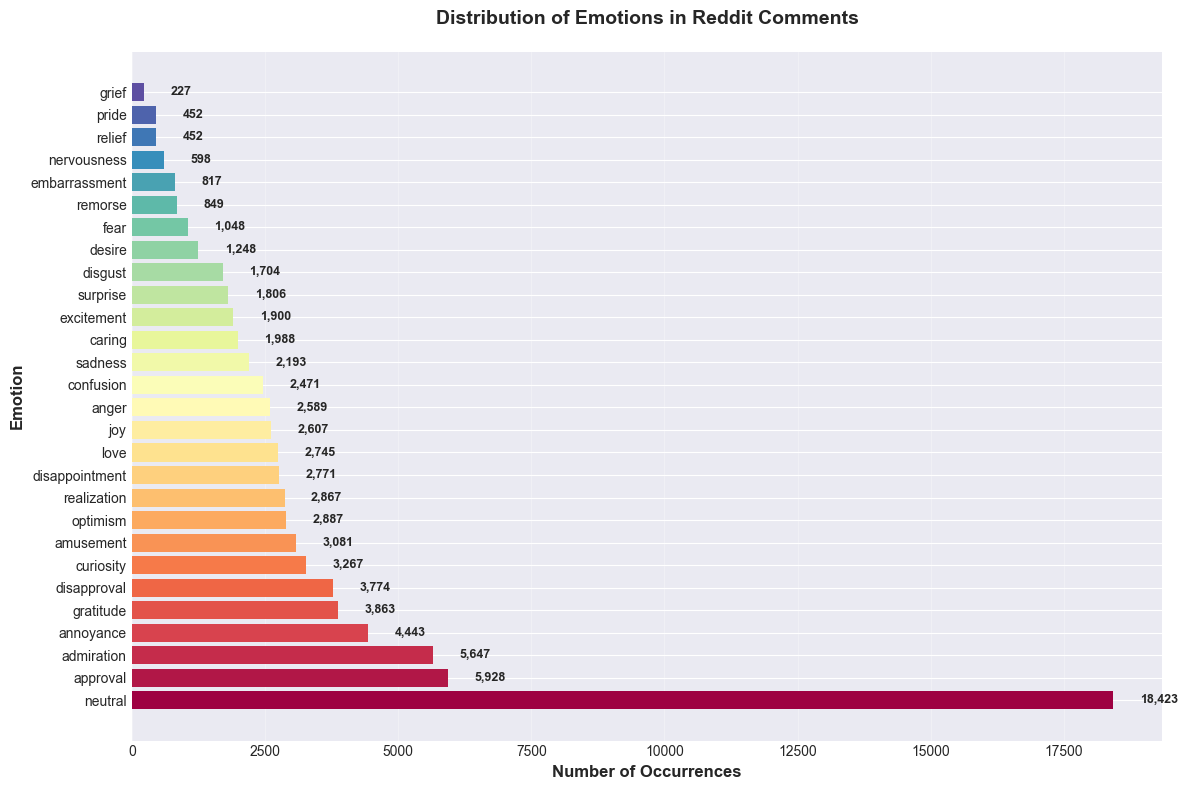

In [130]:
fig, ax = plt.subplots(figsize=(12, 8))
colors = plt.cm.Spectral(np.linspace(0, 1, len(emotion_counts)))
bars = ax.barh(emotion_counts.index, emotion_counts.values, color=colors)

for i, (bar, count) in enumerate(zip(bars, emotion_counts.values)):
    width = bar.get_width()
    ax.text(width + 500, bar.get_y() + bar.get_height()/2, 
            f'{count:,}', ha='left', va='center', fontweight='bold', fontsize=9)

ax.set_xlabel('Number of Occurrences', fontsize=12, fontweight='bold')
ax.set_ylabel('Emotion', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Emotions in Reddit Comments', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

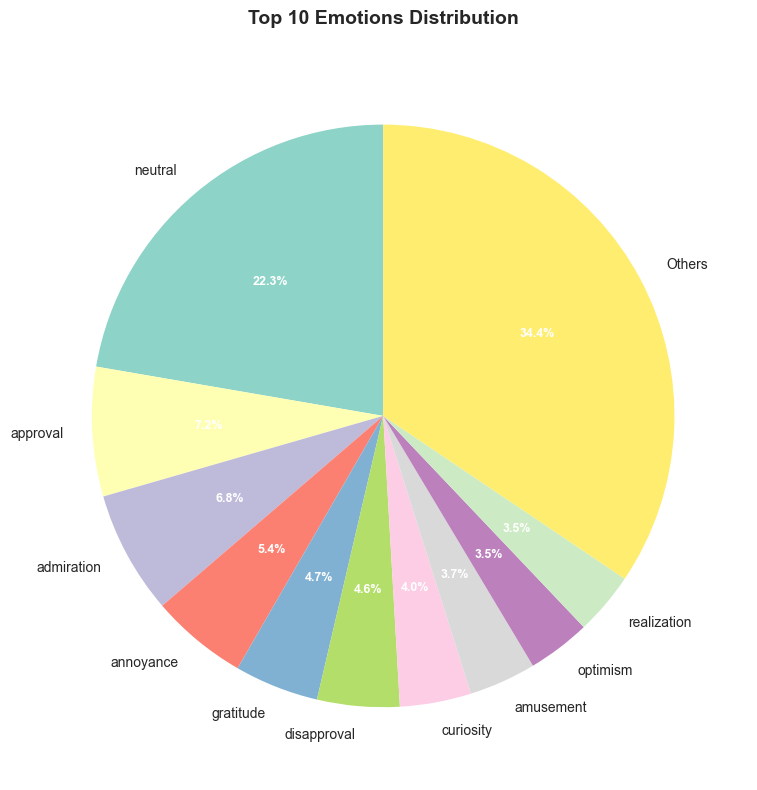

In [131]:
top_10_emotions = emotion_counts.head(10)
others = emotion_counts.iloc[10:].sum()

plot_data = pd.concat([top_10_emotions, pd.Series({'Others': others})])

fig, ax = plt.subplots(figsize=(12, 8))
colors_pie = plt.cm.Set3(np.linspace(0, 1, len(plot_data)))
wedges, texts, autotexts = ax.pie(plot_data.values, labels=plot_data.index, 
                                    autopct='%1.1f%%', startangle=90, 
                                    colors=colors_pie, textprops={'fontsize': 10})

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(9)

ax.set_title('Top 10 Emotions Distribution', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

### Text Analysis

In [132]:
# Analisis panjang teks
df['text_length'] = df['text'].str.len()
df['word_count'] = df['text'].str.split().str.len()

print("TEXT LENGTH STATISTICS")

print(f"Average Character Length: {df['text_length'].mean():.2f}")
print(f"Median Character Length: {df['text_length'].median():.2f}")
print(f"Max Character Length: {df['text_length'].max():,}")
print(f"Min Character Length: {df['text_length'].min()}")
print(f"\nAverage Word Count: {df['word_count'].mean():.2f}")
print(f"Median Word Count: {df['word_count'].median():.2f}")
print(f"Max Word Count: {df['word_count'].max():,}")
print(f"Min Word Count: {df['word_count'].min()}")

TEXT LENGTH STATISTICS
Average Character Length: 69.42
Median Character Length: 67.00
Max Character Length: 703
Min Character Length: 3

Average Word Count: 13.02
Median Word Count: 13.00
Max Word Count: 33
Min Word Count: 1


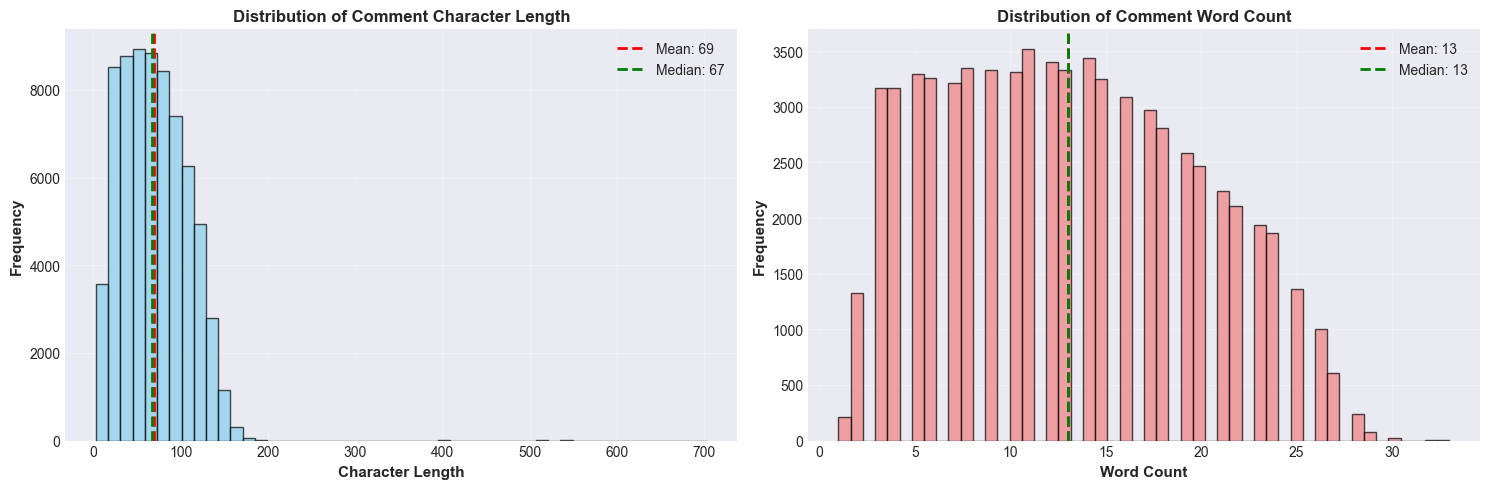

In [133]:
# Distribusi panjang teks
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram untuk character length
axes[0].hist(df['text_length'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(df['text_length'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["text_length"].mean():.0f}')
axes[0].axvline(df['text_length'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["text_length"].median():.0f}')
axes[0].set_xlabel('Character Length', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0].set_title('Distribution of Comment Character Length', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Histogram untuk word count
axes[1].hist(df['word_count'], bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1].axvline(df['word_count'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["word_count"].mean():.0f}')
axes[1].axvline(df['word_count'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["word_count"].median():.0f}')
axes[1].set_xlabel('Word Count', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[1].set_title('Distribution of Comment Word Count', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Multi-Label Analysis (emosi dalam 1 komentar > 1)

In [134]:
# Analisis jumlah label per komentar
df['num_emotions'] = df[emotion_cols].sum(axis=1)

print("MULTI-LABEL STATISTICS")

emotion_dist = df['num_emotions'].value_counts().sort_index()
for num_emotions, count in emotion_dist.items():
    percentage = (count / len(df)) * 100
    print(f"{num_emotions} emotion(s): {count:6,} comments ({percentage:5.2f}%)")

print(f"\nAverage emotions per comment: {df['num_emotions'].mean():.2f}")
print(f"Max emotions in a comment: {df['num_emotions'].max()}")

MULTI-LABEL STATISTICS
0 emotion(s):  1,129 comments ( 1.61%)
1 emotion(s): 56,984 comments (81.41%)
2 emotion(s): 10,291 comments (14.70%)
3 emotion(s):  1,404 comments ( 2.01%)
4 emotion(s):    137 comments ( 0.20%)
5 emotion(s):     29 comments ( 0.04%)
6 emotion(s):     14 comments ( 0.02%)
7 emotion(s):      8 comments ( 0.01%)
8 emotion(s):      2 comments ( 0.00%)
9 emotion(s):      2 comments ( 0.00%)

Average emotions per comment: 1.18
Max emotions in a comment: 9


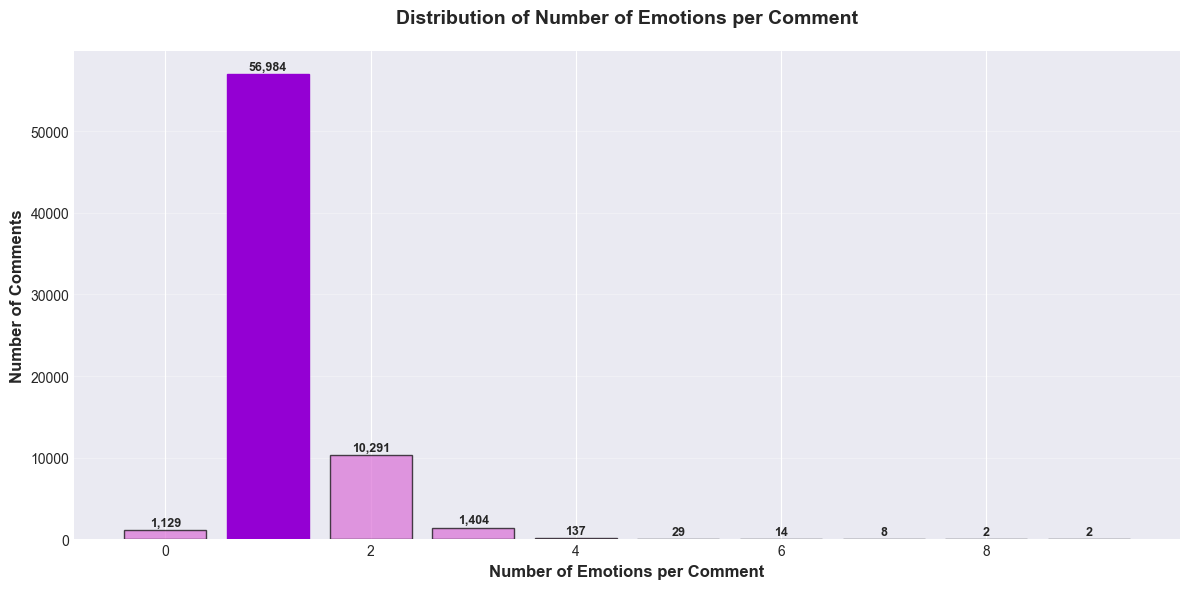

In [135]:
# Visualisasi distribusi jumlah emosi per komentar
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(emotion_dist.index, emotion_dist.values, color='orchid', edgecolor='black', alpha=0.7)

# Highlight the mode
mode_emotions = emotion_dist.idxmax()
bars[mode_emotions].set_color('darkviolet')
bars[mode_emotions].set_alpha(1.0)

for i, (num, count) in enumerate(emotion_dist.items()):
    ax.text(num, count + 200, f'{count:,}', ha='center', va='bottom', fontweight='bold', fontsize=9)

ax.set_xlabel('Number of Emotions per Comment', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Comments', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Number of Emotions per Comment', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Emotion Co-occurrence Analysis

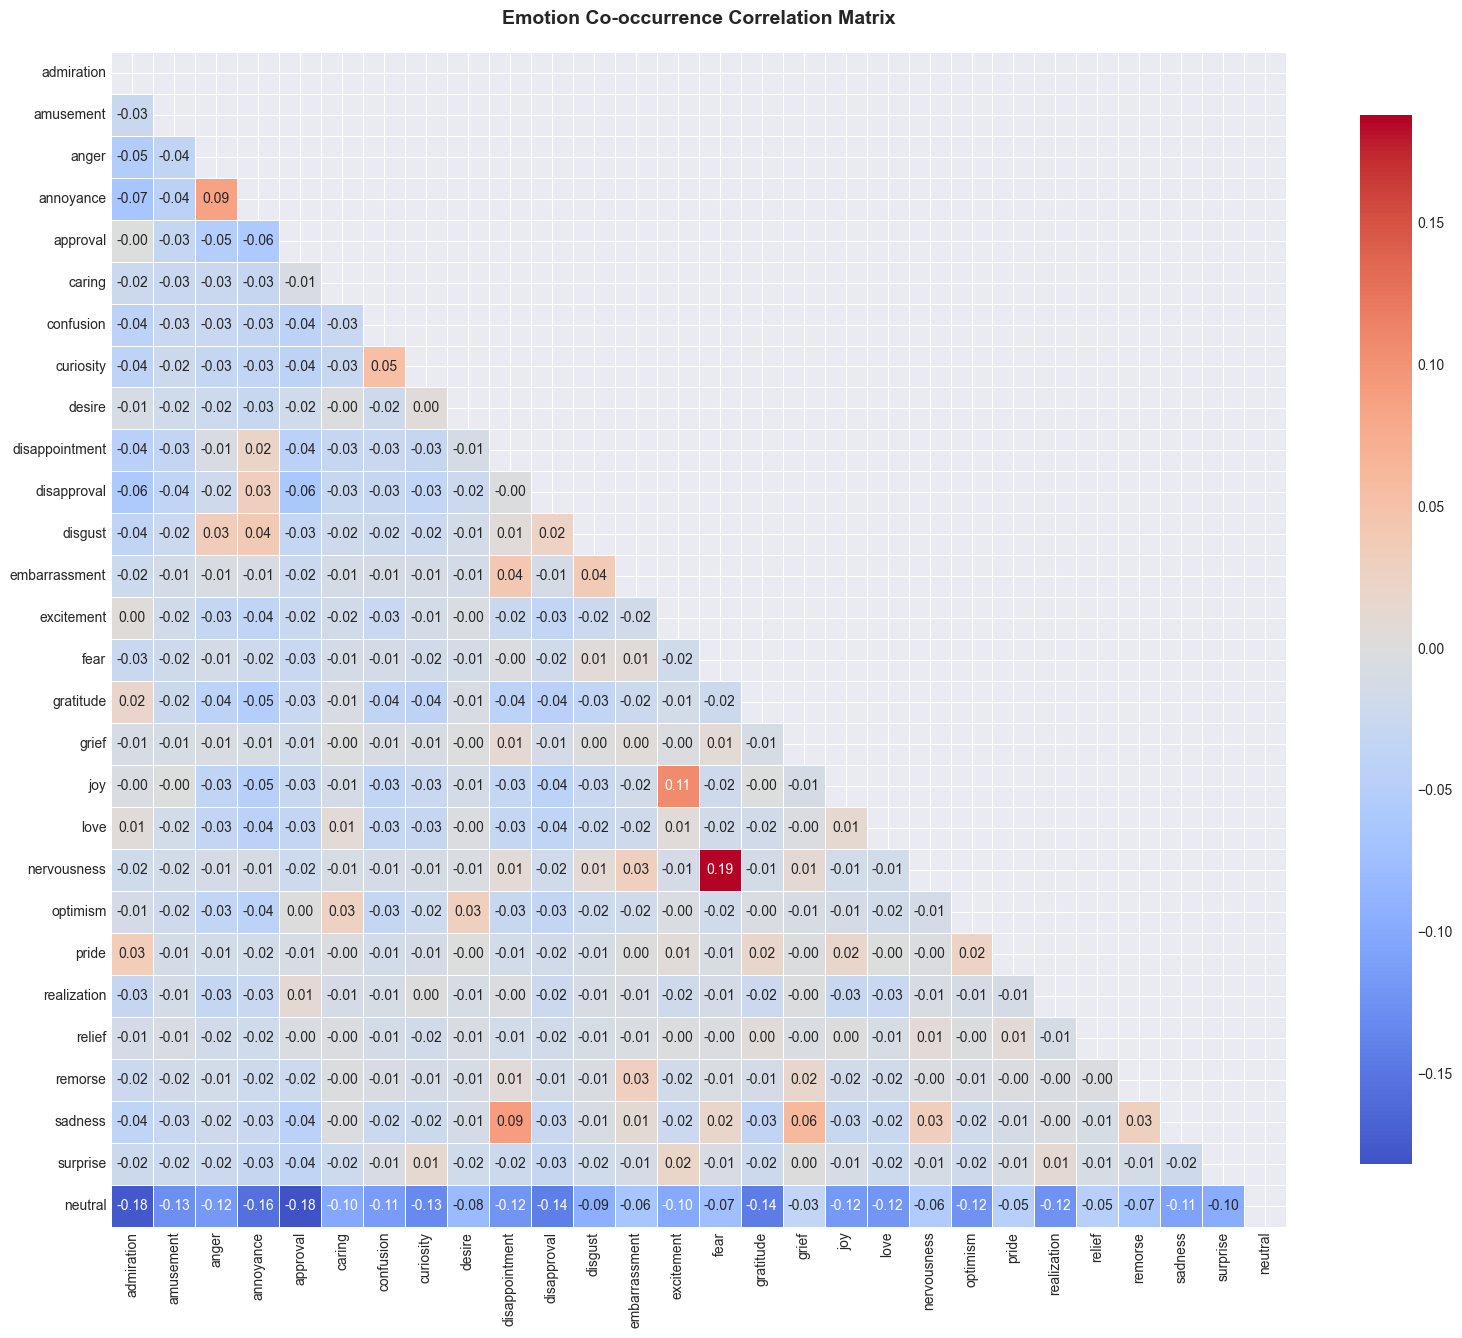

In [136]:
# Membuat matriks korelasi antar emosi
emotion_corr = df[emotion_cols].corr()

fig, ax = plt.subplots(figsize=(16, 14))
mask = np.triu(np.ones_like(emotion_corr, dtype=bool))
sns.heatmap(emotion_corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Emotion Co-occurrence Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

TOP 15 EMOTION PAIRS (CO-OCCURRENCE)
 1. admiration      + approval       :   477 times
 2. anger           + annoyance      :   444 times
 3. admiration      + gratitude      :   390 times
 4. annoyance       + disapproval    :   362 times
 5. disappointment  + sadness        :   302 times
 6. excitement      + joy            :   299 times
 7. approval        + realization    :   287 times
 8. confusion       + curiosity      :   261 times
 9. approval        + optimism       :   248 times
10. annoyance       + disappointment :   248 times
11. admiration      + love           :   240 times
12. annoyance       + disgust        :   214 times
13. approval        + gratitude      :   211 times
14. admiration      + joy            :   194 times
15. admiration      + optimism       :   189 times


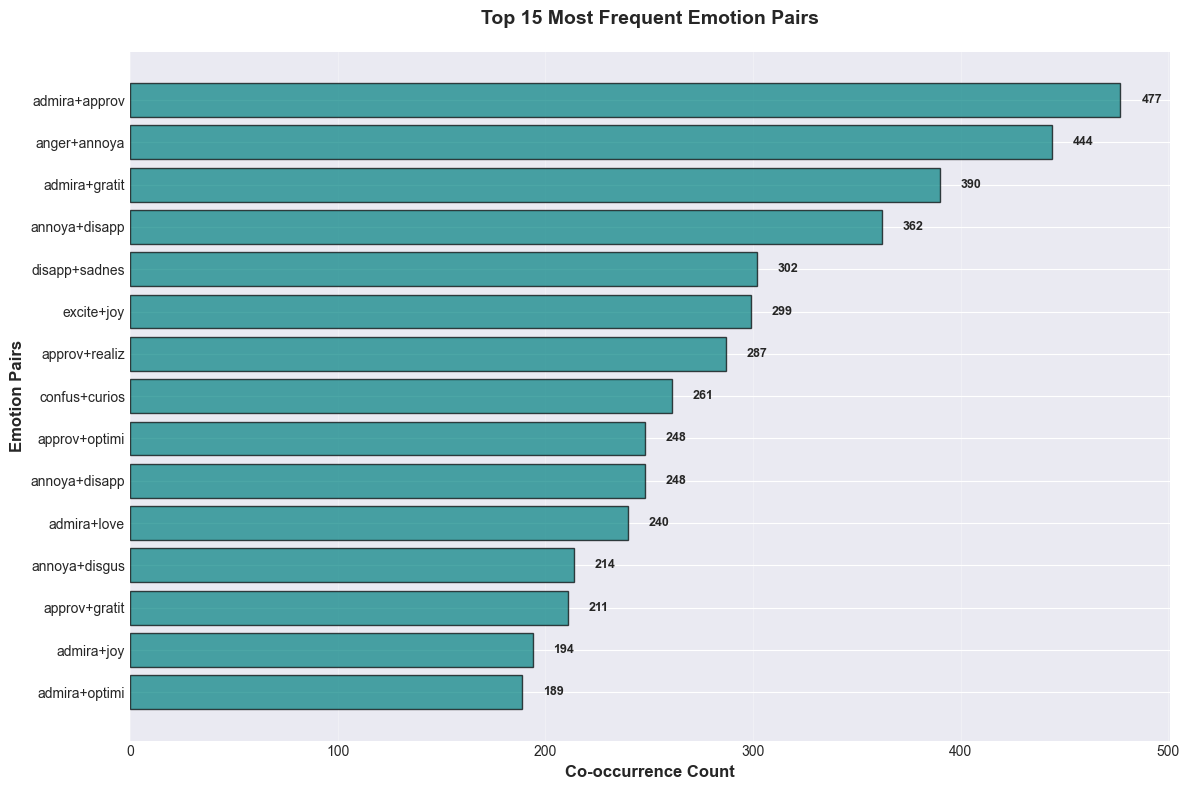

In [137]:
# Top 10 pasangan emosi yang paling sering muncul bersamaan
from itertools import combinations

# Hitung co-occurrence untuk setiap pasangan emosi
co_occurrence = {}
for comment_emotions in df[emotion_cols].values:
    active_emotions = [emotion_cols[i] for i, val in enumerate(comment_emotions) if val == 1]
    if len(active_emotions) >= 2:
        for pair in combinations(sorted(active_emotions), 2):
            co_occurrence[pair] = co_occurrence.get(pair, 0) + 1

# Sort dan ambil top 15
top_pairs = sorted(co_occurrence.items(), key=lambda x: x[1], reverse=True)[:15]

print("=" * 80)
print("TOP 15 EMOTION PAIRS (CO-OCCURRENCE)")
print("=" * 80)
for i, (pair, count) in enumerate(top_pairs, 1):
    print(f"{i:2d}. {pair[0]:15s} + {pair[1]:15s}: {count:5,} times")
    
# Visualisasi
pairs_labels = [f"{p[0][0][:6]}+{p[0][1][:6]}" for p in top_pairs]
pairs_counts = [p[1] for p in top_pairs]

fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.barh(range(len(pairs_labels)), pairs_counts, color='teal', edgecolor='black', alpha=0.7)

for i, (bar, count) in enumerate(zip(bars, pairs_counts)):
    width = bar.get_width()
    ax.text(width + 10, bar.get_y() + bar.get_height()/2, 
            f'{count:,}', ha='left', va='center', fontweight='bold', fontsize=9)

ax.set_yticks(range(len(pairs_labels)))
ax.set_yticklabels(pairs_labels)
ax.set_xlabel('Co-occurrence Count', fontsize=12, fontweight='bold')
ax.set_ylabel('Emotion Pairs', fontsize=12, fontweight='bold')
ax.set_title('Top 15 Most Frequent Emotion Pairs', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)
ax.invert_yaxis()
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Word Cloud of Top Comment Words')

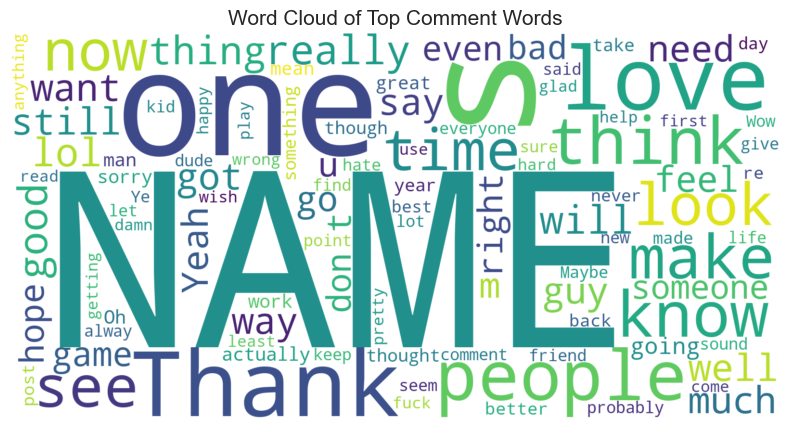

In [138]:
TEXT_COLUMN = 'text'
text_data = df[TEXT_COLUMN].dropna().astype(str)
full_text = " ".join(text_data)
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    width=1600,
    height=800,
    background_color='white',
    stopwords=stopwords,
    max_words=100,
    colormap='viridis',
    contour_width=1,
    contour_color='steelblue'
).generate(full_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Top Comment Words', fontsize=15)

### Key Insights Summary

In [140]:
print("=" * 80)
print("KEY INSIGHTS FROM EDA")
print("=" * 80)

print("\n1. DATASET OVERVIEW:")
print(f"   - Total comments: {len(df):,}")
print(f"   - Total features: {df.shape[1]} (1 text + 28 emotions)")

print("\n2. EMOTION DISTRIBUTION:")
top_3_emotions = emotion_counts.head(3)
print(f"   - Most common: {top_3_emotions.index[0]} ({top_3_emotions.values[0]:,})")
print(f"   - Second: {top_3_emotions.index[1]} ({top_3_emotions.values[1]:,})")
print(f"   - Third: {top_3_emotions.index[2]} ({top_3_emotions.values[2]:,})")
print(f"   - Avg emotions per comment: {df['num_emotions'].mean():.2f}")

print("\n3. TEXT CHARACTERISTICS:")
print(f"   - Avg character length: {df['text_length'].mean():.0f}")
print(f"   - Avg word count: {df['word_count'].mean():.1f}")
print(f"   - Min character length: {df['text_length'].min()}")
print(f"   - Max character length: {df['text_length'].max():,}")

print("\n4. MULTI-LABEL NATURE:")
single_label = (df['num_emotions'] == 1).sum()
multi_label = (df['num_emotions'] > 1).sum()
no_label = (df['num_emotions'] == 0).sum()
print(f"   - Single emotion: {single_label:,} ({single_label/len(df)*100:.1f}%)")
print(f"   - Multiple emotions: {multi_label:,} ({multi_label/len(df)*100:.1f}%)")
print(f"   - No emotion: {no_label:,} ({no_label/len(df)*100:.1f}%)")

print("\n" + "=" * 80)

KEY INSIGHTS FROM EDA

1. DATASET OVERVIEW:
   - Total comments: 70,000
   - Total features: 32 (1 text + 28 emotions)

2. EMOTION DISTRIBUTION:
   - Most common: neutral (18,423)
   - Second: approval (5,928)
   - Third: admiration (5,647)
   - Avg emotions per comment: 1.18

3. TEXT CHARACTERISTICS:
   - Avg character length: 69
   - Avg word count: 13.0
   - Min character length: 3
   - Max character length: 703

4. MULTI-LABEL NATURE:
   - Single emotion: 56,984 (81.4%)
   - Multiple emotions: 11,887 (17.0%)
   - No emotion: 1,129 (1.6%)

